# 2.2 Discrete-Time Signals

In [1]:
import numpy as np
import scipy
from scipy import io
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for plottig sample signals
n = np.arange(-20,21,1)

def myplot(n,y):
    plt.figure(figsize=(15,4))
    plt.xticks(n)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid()
    plt.bar(n,y,width=0.15,align='center')
    plt.plot(n,y,'ro',markersize=6)



## Special Sequences
Impulse (Delta function):
\begin{eqnarray}
 \delta[n] &=& 1, \quad n = 0 \\
           &=& 0, \quad n \neq 0.
\end{eqnarray}

Unit step:
\begin{eqnarray}
 u[n] &=& 1, \quad n \ge 0 \\
      &=& 0, \quad n \lt 0.
\end{eqnarray}

Exponential sequence:
\begin{eqnarray}
 x[n] &=& A\alpha^n
\end{eqnarray}

Sinusodial sequence:
\begin{eqnarray}
 x[n] &=& A\cos(\omega n + \phi)
\end{eqnarray}

Complex exponential sequence:
\begin{eqnarray}
 x[n] &=& Ae^{j \omega n} \\
      &=& |A|e^{j \phi} e^{j \omega n} \\
      &=& |A|e^{j(\phi+\omega n)} \\
      &=& |A|\cos(\omega n + \phi) + j|A|\sin(\omega n + \phi)\\
\end{eqnarray}



In [3]:
# Impulse
def impulse(n):
    if(n==0):
        return(1)
    else:
        return(0)
    
# Unit step
def unit(n):
    if(n>=0):
        return(1)
    else:
        return(0)
    
# Exponential sequence
class ExpSeq:
    def __init__(self, A, alpha):
        self.A = A
        self.alpha = alpha
    def func(self, n):
        return(self.A*self.alpha**n)
    
# Sinusodial sequence
class SinSeq:
    def __init__(self, A, omega, phi):
        self.A = A
        self.omega = omega
        self.phi = phi
    def func(self, n):
        return(self.A*np.cos(self.omega*n+self.phi))


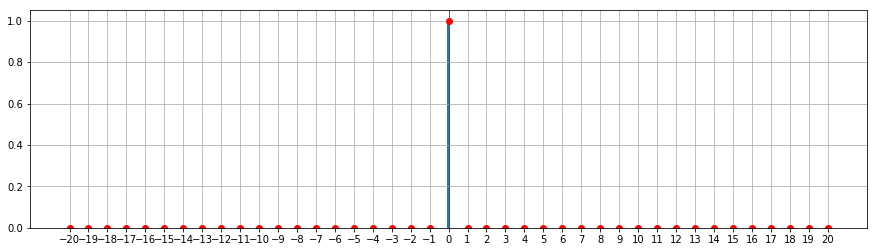

In [4]:
# plot impulse
y = list(map(impulse,n))

myplot(n,y)

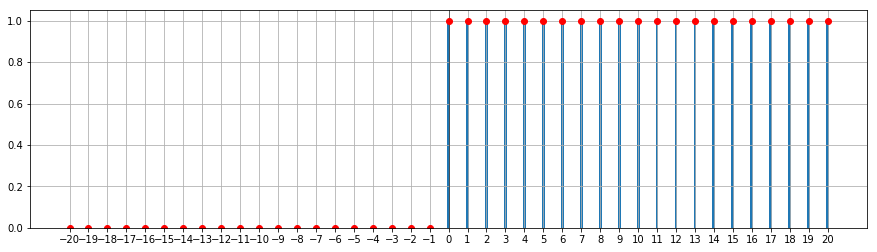

In [5]:
# plot unit function
y = list(map(unit,n))

myplot(n,y)

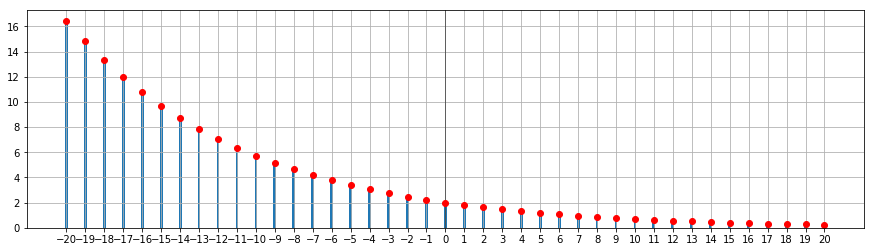

In [6]:
# plot exponential sequence
A = 2.0
alpha = 0.9
myExpSeq = ExpSeq(A, alpha)
y = list(map(myExpSeq.func,n))

myplot(n,y)

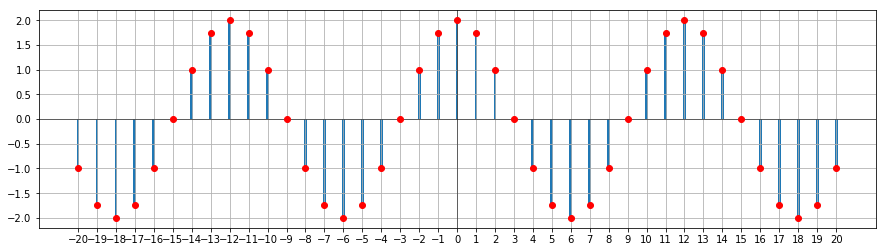

In [7]:
# plot exponential sequence
N = 12
A = 2
phi = 0
omega = 2*np.pi/N  # This value satisfied N = integer = 2*pi*k/N
mySinSeq = SinSeq(A, omega, phi)
y = list(map(mySinSeq.func,n))

myplot(n,y)

## 2.3 Discrete-Time Systems: Linear time-invariant (LTI) systems
## Convolution

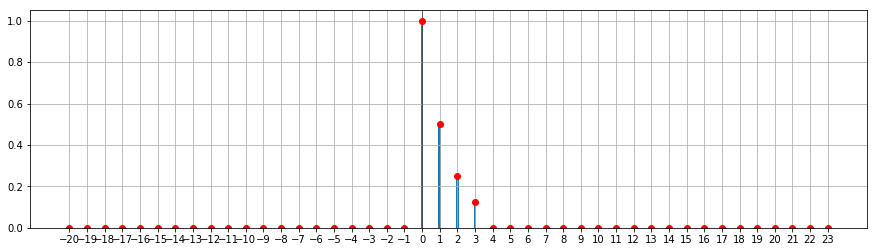

In [34]:
h = np.array([1,0.5,0.25,0.125]) # Example 2.1: a=0.5, truncation length 5

y = list(map(impulse,n))
# y = list(map(unit,n))
# y = list(map(myExpSeq.func,n))
# y = list(map(mySinSeq.func,n))

nn = np.arange(-20,21+h.shape[0]-1,1) # Length of output: M+L-1
out = np.convolve(h,y)
myplot(nn,out)
